In [7]:
import numpy as np 
import dgd
import datamol as dm
from dgd.analysis.rdkit_functions import *
from dgd.diffusion_model_discrete import DiscreteDenoisingDiffusion
from omegaconf import DictConfig, OmegaConf
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
config = "/home/cristian_valencediscovery_com/dev/FragDiffusion/configs/experiment/frag_all.yaml"
config = OmegaConf.load(config)
print(config)

{'general': {'name': 'frag_bs_128_all_viz_metrics', 'wandb': 'online', 'gpus': 1, 'resume': None, 'test_only': None, 'check_val_every_n_epochs': 20, 'sample_every_val': 1, 'val_check_interval': None, 'samples_to_generate': 40, 'samples_to_save': 9, 'chains_to_save': 1, 'log_every_steps': 50, 'number_chain_steps': 50, 'overfit': 0, 'progress_bar': True, 'final_model_samples_to_generate': 40, 'final_model_samples_to_save': 30, 'final_model_chains_to_save': 20, 'evaluate_all_checkpoints': False}, 'model': {'type': 'discrete', 'transition': 'marginal', 'model': 'graph_tf', 'diffusion_steps': 1000, 'diffusion_noise_schedule': 'cosine', 'extra_features': 'cycles', 'n_layers': 5, 'hidden_mlp_dims': {'X': 256, 'E': 128, 'y': 128}, 'hidden_dims': {'dx': 256, 'de': 64, 'dy': 64, 'n_head': 8, 'dim_ffX': 256, 'dim_ffE': 128, 'dim_ffy': 128}, 'lambda_train': [5, 0]}, 'train': {'n_epochs': 30000, 'batch_size': 128, 'lr': 0.0002, 'clip_grad': None, 'save_model': True, 'num_workers': 0, 'ema_decay': 0

In [21]:
model=DiscreteDenoisingDiffusion.from_config(config, checkpoint="/home/cristian_valencediscovery_com/dev/FragDiffusion/dgd/expts/outputs/2023-09-04/09-42-42/checkpoints/run_1000dsteps_256batch/epoch=1234.ckpt")

Dataset /home/cristian_valencediscovery_com/dev/FragDiffusion/dgd/datasets/../../data/frag/mol_frag_graphs_100000.pt.gz loaded from file
Dataset sizes: train 64000, val 16000, test 20000
Saving split indices to /home/cristian_valencediscovery_com/dev/FragDiffusion/notebooks
[Noise schedule: cosine] alpha_bar: tensor([9.9996e-01, 9.9991e-01, 9.9986e-01,  ..., 9.6956e-06, 2.4239e-06,
        2.4243e-10])
Marginal distribution of the classes: tensor([0.2283, 0.0823, 0.0596, 0.0391, 0.0321, 0.0351, 0.0261, 0.0286, 0.0280,
        0.0195, 0.0157, 0.0166, 0.0199, 0.0132, 0.0130, 0.0145, 0.0149, 0.0116,
        0.0141, 0.0127, 0.0095, 0.0092, 0.0110, 0.0073, 0.0066, 0.0066, 0.0068,
        0.0068, 0.0054, 0.0063, 0.0060, 0.0081, 0.0047, 0.0070, 0.0053, 0.0062,
        0.0056, 0.0057, 0.0047, 0.0045, 0.0054, 0.0063, 0.0049, 0.0032, 0.0052,
        0.0050, 0.0044, 0.0042, 0.0033, 0.0037, 0.0037, 0.0032, 0.0024, 0.0029,
        0.0030, 0.0030, 0.0029, 0.0033, 0.0034, 0.0018, 0.0019, 0.0023, 0.00

/home/cristian_valencediscovery_com/mambaforge/envs/fragdiff/lib/python3.11/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
/home/cristian_valencediscovery_com/mambaforge/envs/fragdiff/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'train_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['train_metrics'])`.
  rank_zero_warn(
/home/cristian_valencediscovery_com/mambaforge/envs/fragdiff/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'sampling_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sampling_metrics'])`.
  rank_zero_warn(


In [27]:
model.dataset_info

In [28]:
from dgd.datasets.frag_dataset import FragDataModule
datamodule = FragDataModule(config)

Dataset /home/cristian_valencediscovery_com/dev/FragDiffusion/dgd/datasets/../../data/frag/mol_frag_graphs_100000.pt.gz loaded from file
Dataset sizes: train 64000, val 16000, test 20000
Saving split indices to /home/cristian_valencediscovery_com/dev/FragDiffusion/notebooks


In [39]:
test_batch=next(iter(datamodule.dataloaders["train"]))

In [42]:
test_batch.batch

tensor([  0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   1,   2,
          2,   2,   2,   2,   2,   2,   2,   3,   3,   3,   3,   3,   4,   4,
          4,   4,   4,   4,   4,   4,   5,   5,   5,   5,   5,   5,   6,   6,
          6,   6,   6,   6,   6,   7,   7,   7,   7,   7,   7,   7,   7,   8,
          8,   8,   8,   8,   8,   8,   8,   8,   9,   9,   9,   9,   9,   9,
         10,  10,  10,  10,  10,  10,  10,  11,  11,  11,  11,  11,  11,  11,
         11,  12,  12,  12,  12,  12,  12,  13,  13,  13,  13,  13,  13,  13,
         13,  13,  13,  14,  14,  14,  14,  14,  14,  14,  14,  15,  15,  15,
         15,  15,  15,  16,  16,  16,  16,  16,  16,  17,  17,  17,  17,  17,
         17,  18,  18,  18,  18,  18,  18,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  20,  20,  20,  20,  20,  20,  20,  21,  21,
         21,  21,  21,  22,  22,  22,  22,  23,  23,  23,  23,  23,  23,  24,
         24,  24,  24,  24,  24,  24,  25,  25,  25,  25,  25,  

2023-09-05 14:02:33.361 | INFO     | dgd.diffusion_model_discrete:random_sample:570 - Number of valid molecules: 0.4


Example of generated X:  tensor([ 0, 15,  0,  2,  6, 82,  1,  0,  0])
Example of generated E:  tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 2, 0],
        [0, 2, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 3, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 3, 2],
        [0, 0, 0, 0, 3, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 3, 0, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 0, 0]])
Example of generated X:  tensor([ 0,  5,  9,  0, 12,  4, 21,  1,  9])
Example of generated E:  tensor([[0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 3, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 3, 0],
        [0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 2, 0, 0, 0, 2, 0, 0, 0],
        [0, 0, 3, 0, 3, 0, 0, 0, 3],
        [0, 0, 0, 0, 0, 0, 0, 3, 0]])
Example of generated X:  tensor([58,  0,  0,  0,  6,  7,  0, 50, 96])
Example of generated E:  tensor([[0, 0, 0, 0, 3, 0, 3, 0, 0],
        [0

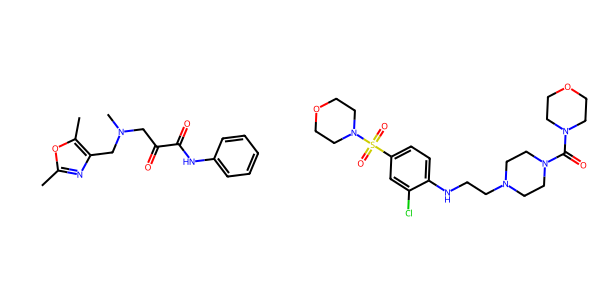

In [233]:
model.model.eval()
mols=model.random_sample(batch_id =0, batch_size=5, sanitize=True, num_nodes=None)
dm.viz.to_image(mols, use_svg=False)

In [197]:
model.visualization_tools.frag_to_mol.edge_converter._frag_edge_to_atom_edge

{(0, 52): {0: (0, 2), 1: (0, 4), 2: (0, 3)},
 (79, 52): {0: (1, 4), 1: (1, 0), 2: (1, 1)},
 (2, 52): {0: (0, 0), 1: (0, 2), 2: (0, 4)},
 (2, 13): {0: (0, 1)},
 (4, 36): {0: (1, 0), 1: (0, 0)},
 (0, 95): {0: (0, 0)},
 (0, 25): {0: (0, 1), 1: (0, 3), 2: (0, 2)},
 (95, 46): {0: (0, 0), 1: (0, 2)},
 (4, 46): {0: (0, 2), 1: (1, 2), 2: (0, 0)},
 (13, 46): {0: (1, 2), 1: (1, 0)},
 (2, 4): {0: (0, 0), 1: (0, 1)},
 (0, 72): {0: (0, 2), 1: (0, 5), 2: (0, 0)},
 (4, 72): {0: (0, 0)},
 (0, 8): {0: (0, 2), 1: (0, 0)},
 (0, 87): {0: (0, 1)},
 (0, 86): {0: (0, 3), 1: (0, 5), 2: (0, 0)},
 (2, 86): {0: (0, 0), 1: (0, 5)},
 (44, 44): {0: (1, 1), 1: (1, 3), 2: (3, 1)},
 (44, 13): {0: (3, 1), 1: (1, 1)},
 (2, 23): {0: (0, 1)},
 (2, 8): {0: (0, 2), 1: (0, 0)},
 (8, 76): {0: (2, 3), 1: (0, 2), 2: (2, 2)},
 (9, 76): {0: (0, 0)},
 (0, 4): {0: (0, 0), 1: (0, 1)},
 (0, 0): {0: (0, 0)},
 (0, 15): {0: (0, 0), 1: (0, 1)},
 (0, 6): {0: (0, 1)},
 (20, 8): {0: (1, 0), 1: (0, 2), 2: (0, 0)},
 (20, 6): {0: (1, 1), 1: (0